<a href="https://colab.research.google.com/github/katiacardoso/InteligenciaArtificial/blob/main/ventilador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Entrada: Temperatura*

* Universo: 0 a 100
* Conjunto difuso: cold, warm, hot


*Saida: Velocidade do Ventilador*
* Universo: 0 a 100
* Conjunto difuso: slow, medium, fast

*Regras:*
* If Hot , than Fast
* If Warm,  than Medium
* If Cold, than Slow




In [1]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=f0d7f1a1f64459849730534c4323a8d030f892d414f74b9931236378e48b31e6
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=288c76b88733ffc07081eac40318ee3f10a2c832a1418ad27ed49a06fc744c9f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f7

In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# Cria as variáveis do problema
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
velocidade = ctrl.Consequent(np.arange(0, 101, 1), 'velocidade')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
temperatura.automf(names=['cold', 'warm', 'hot'])

# Cria as funções de pertinência usando tipos variados
temperatura['cold'] = fuzz.trimf(temperatura.universe, [0,20,50])
temperatura['warm'] = fuzz.trimf(temperatura.universe, [40,55,77])
temperatura['hot'] = fuzz.trimf(temperatura.universe, [65,82,100])

velocidade['slow'] = fuzz.trimf(velocidade.universe, [0,25,50])
velocidade['medium'] = fuzz.trimf(velocidade.universe, [40,55,78])
velocidade['fast'] = fuzz.trimf(velocidade.universe, [65,84,100])

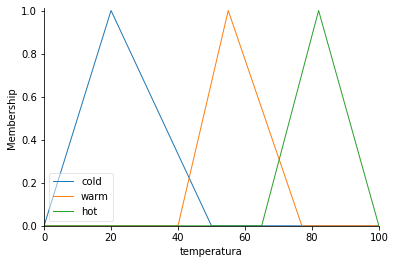

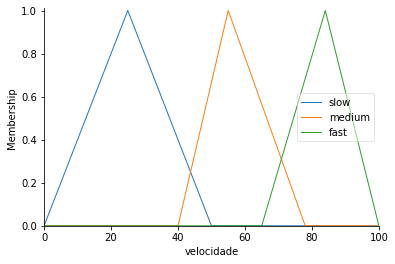

In [56]:
temperatura.view()
velocidade.view()

In [57]:
rule1 = ctrl.Rule(temperatura['hot'], velocidade['fast'])
rule2 = ctrl.Rule(temperatura['warm'], velocidade['medium'])
rule3 = ctrl.Rule(temperatura['cold'], velocidade['slow'])

In [67]:
velocidade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
velocidade_simulador = ctrl.ControlSystemSimulation(velocidade_ctrl)

# Entrando com alguns valores para qtemperatura
velocidade_simulador.input['temperatura'] = 52

# Computando o resultado
velocidade_simulador.compute()
print(velocidade_simulador.output['velocidade'])


57.75555555555557


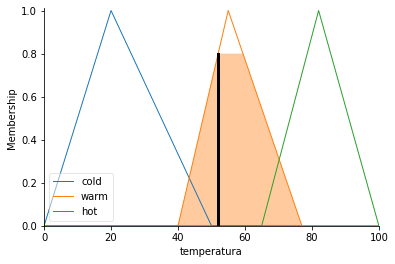

In [68]:
temperatura.view(sim=velocidade_simulador)